In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 텐서플로에서 텐서 만들기

a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [3]:
# 13장 ch2

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()

model.build(input_shape=(None, 1))
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 파이토치는 무조건 상속받은 모델을 쓴다

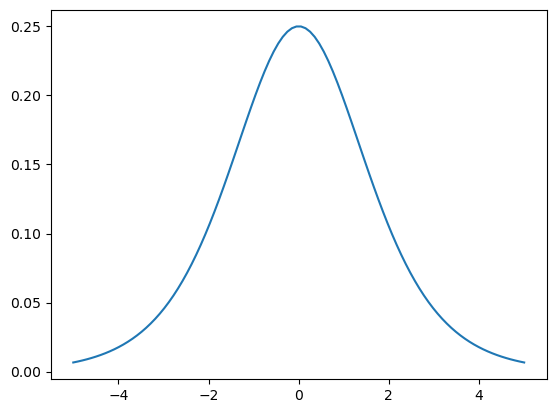

In [13]:
# sigmoid 한계
sigmoid = lambda x : 1/(1+np.exp(-x))
sigmoid_ = lambda x : sigmoid(x)*(1-sigmoid(x))

x = np.linspace(-5,5,100)
plt.plot(x,sigmoid_(x))

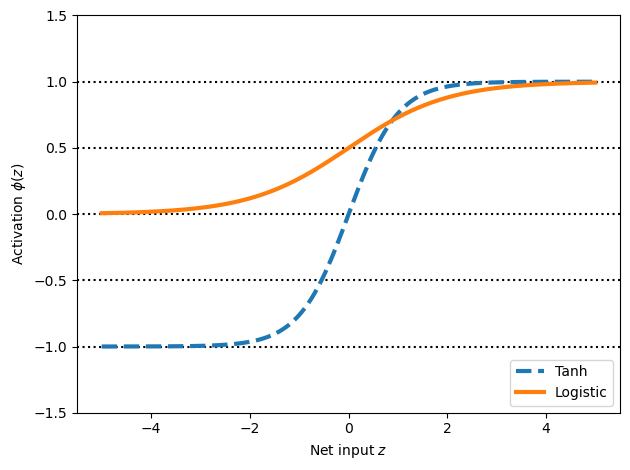

In [7]:
# 하이퍼볼릭 탄젠트로 출력 범위 넓히기

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/13_8.png', dpi=300)
plt.show()


In [46]:
# backward 연습 하던 코드

In [39]:
def relu(x):
    return np.where(x >0,x,0)
class Test:
    def __init__(self):
        self.w = np.random.randn(4,3)
    def forward(self,x):
        self.x = x
        self.result = np.dot(self.x,self.w)
        self.result = relu(self.result)
        self.act_ = np.where(self.result > 0,1,0)
        return self.result
    def backward(self):
        self.result = self.forward(self.x)*self.act_ 
        self.w_ = np.dot(self.x.T, self.forward(self.x))
        self.x_ = np.dot(self.forward(self.x),self.w.T)
        return self.w_, self.x_

In [40]:
x = np.random.randn(5,4)

In [41]:
model = Test()

In [43]:
model.forward(x)

array([[0.        , 0.09841591, 2.05776721],
       [4.19541074, 2.49240372, 0.        ],
       [1.81172269, 0.        , 2.10150691],
       [0.        , 0.        , 1.14710256],
       [0.        , 1.61319618, 0.        ]])

In [44]:
model.backward()

(array([[-3.96414913, -1.86685132,  2.43882644],
        [-2.05114073,  3.04578356,  1.02562814],
        [-2.52731181,  2.43995046, -3.58678727],
        [ 6.99809213,  4.24631058, -3.19166755]]),
 array([[ 0.13074271,  1.75294927, -4.19667111, -0.75160299],
        [-3.54755745, -7.93768048,  0.14106168,  9.47040081],
        [ 0.0819055 , -2.00802316, -6.01557242,  2.82199818],
        [ 0.14189467,  0.95991082, -2.42291148, -0.44229386],
        [-2.02927701,  0.50784587,  2.45460248,  0.68550142]]))

In [45]:
np.dot(model.backward()[1],model.backward()[0])

array([[  1.23268026,  -8.33618245,  19.56816626],
       [ 96.26257699,  23.00475225, -47.52531453],
       [ 38.74588291,  -8.96352729,  10.70996683],
       [  0.49683576,  -5.13111674,  11.43269104],
       [  5.59634964,  14.23510747, -15.420223  ]])